In [2]:
import networkx as nx
import matplotlib.pyplot as plt

SEED = 1234

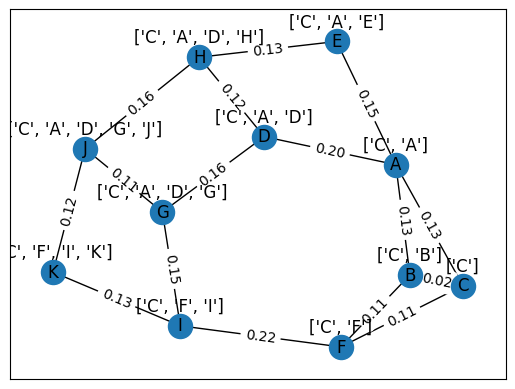

In [3]:
edge_list = [('A','B'), ('A','C'), ('A','D'), ('A','E'), ('B','C'), ('B','F'), ('C','F'), ('D','G'), ('D','H'), ('E','H'), ('F','I'), ('G','I'), ('G','J'), ('H','J'), ('I','K'), ('J','K')]

G = nx.Graph()
G.add_edges_from(edge_list)

# nx.draw(G, with_labels=True)

# Compute all shortest paths from node C
shortest_paths = dict(nx.shortest_path_length(G, 'C'))

# Create a subgraph containing only the nodes in the shortest paths
subgraph_nodes = ['C'] + [node for node, dist in shortest_paths.items()]
subgraph = G.subgraph(subgraph_nodes)

# Draw the subgraph with node labels
pos = nx.spring_layout(subgraph, seed=SEED)
nx.draw_networkx(subgraph, pos=pos, with_labels=True)

# Drawing shortest path labels to overlay over first graph
shortest_path_counts = dict(nx.shortest_path(G, source='C'))
pos_labels = {node: (pos[node][0], pos[node][1] + 0.1) for node in subgraph.nodes}
nx.draw_networkx_labels(subgraph, pos=pos_labels, labels=shortest_path_counts)

# Compute betweenness centrality for each edge
edge_betweenness = nx.edge_betweenness_centrality(G)
# Add edge labels for betweenness centrality
edge_labels = {(u, v): f"{edge_betweenness[(u, v)]:.2f}" for u, v in subgraph.edges}
# print(edge_betweenness)
# print(edge_labels)

nx.draw_networkx_edge_labels(subgraph, pos=pos, edge_labels=edge_labels)

plt.show()



In [19]:
shortest_path_counts = dict(nx.shortest_path(G, source='C'))
shortest_paths

{'C': ['C'],
 'A': ['C', 'A'],
 'B': ['C', 'B'],
 'F': ['C', 'F'],
 'D': ['C', 'A', 'D'],
 'E': ['C', 'A', 'E'],
 'I': ['C', 'F', 'I'],
 'G': ['C', 'A', 'D', 'G'],
 'H': ['C', 'A', 'D', 'H'],
 'K': ['C', 'F', 'I', 'K'],
 'J': ['C', 'A', 'D', 'G', 'J']}